<a href="https://colab.research.google.com/github/lynseybwisa/IBM-Machine-Learning/blob/develop/Ames_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), [www.amstat.org/publications/jse/v19n3/decock.pdf](http://www.amstat.org/publications/jse/v19n3/decock.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Steps**

> 1.  Simple EDA
> 2.  One-hot Encoding variables
> 3.  Log transformation for skewed variables
> 4.  Pair plot for features
> 5.  Basic feature engineering: adding polynomial and interaction terms
> 6.  Feature engineering: categories and features derived from category aggregates

## 1. Simple EDA

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


### Load the Data, Examine and Explore

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv", sep='\t')

Examine the columns, look at missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Look at a histogram of this specific column because the author of this dataset specified there are outliers in this column

This histogram shows there is not a lot of frequench around 4000-5000

<Axes: >

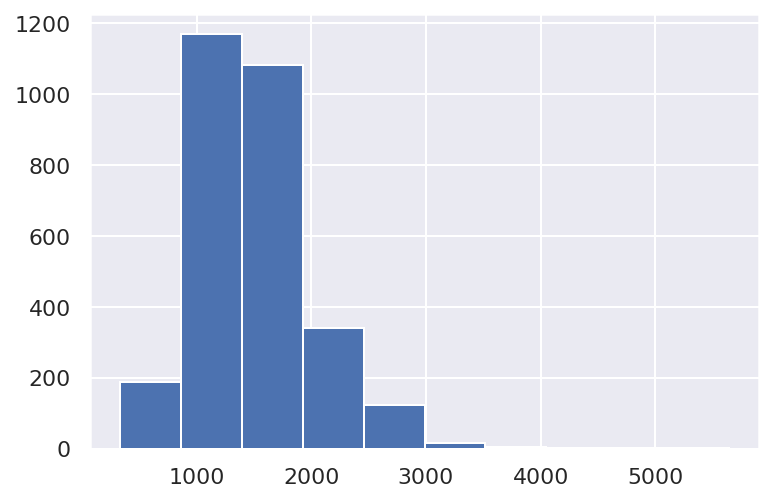

In [5]:
df['Gr Liv Area'].hist()

Filter out all the values below 4000

In [6]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]

In [7]:
print("Number of rows in the data:", df.shape[0])


Number of rows in the data: 2925


In [8]:
print("Number of columns in the data:", df.shape[1])

Number of columns in the data: 82


In [9]:

data = df.copy() # Keep a copy our original data 

Look at the 1st 5 values

In [10]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
len(df.PID.unique())

2925

drop the unique columns cause they will not help in analysing the model

set axis=1 because by default it looks for row indexes and we want column

inplace =true sets it to a copy of itself

In [12]:
df.drop(['PID', 'Order'], axis=1, inplace=True)

## 2. Log transformation for skewed variables

Pull out the numerical variables (floats and int)

In [13]:
df.select_dtypes('number').columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

above 0 = right skew, below 0 = left skew and 0 = no skew

use 0.75 to determine the skewness

above 0.75 is heavily skewed and should undergo some type of transformation

In [14]:
#create a list of float columns to check for skewing
num_cols= df.select_dtypes('number').columns

In [15]:
# define a limit above which we will log transform
skew_limit = 0.75 
skew_vals = df[num_cols].skew()

In [16]:
skew_vals

MS SubClass         1.356549
Lot Frontage        1.111071
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
Mas Vnr Area        2.565458
BsmtFin SF 1        0.821985
BsmtFin SF 2        4.135900
Bsmt Unf SF         0.925021
Total Bsmt SF       0.399079
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Bsmt Full Bath      0.615553
Bsmt Half Bath      3.965970
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Garage Yr Blt      -0.382039
Garage Cars        -0.219734
Garage Area         0.213681
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold       

filter down to those above our skew limit

In [17]:
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)

skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

Let's look at what happens to one of these features, when we apply np.log1p visually.

In [18]:
# Choose a field
field = "SalePrice"

Create two "subplots" and a "figure" using matplotlib

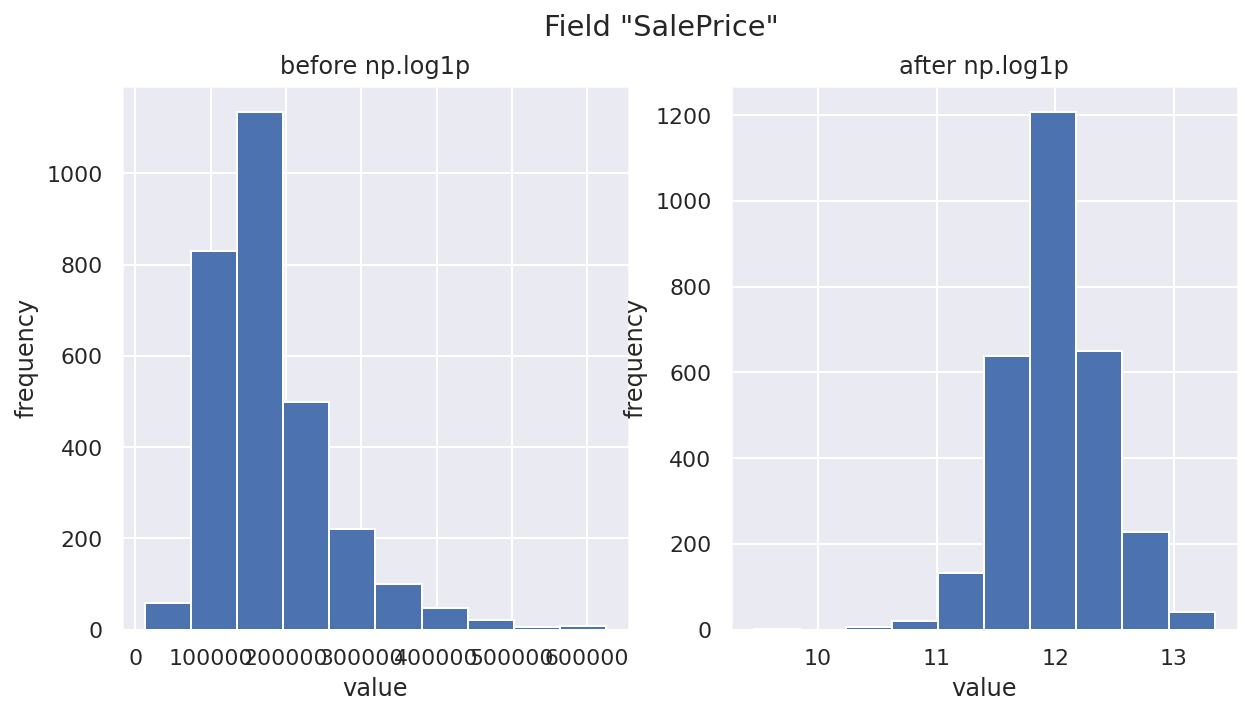

In [19]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

#Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

Perform the skew transformation:


In [20]:
for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

##Missing Values

In [21]:
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [22]:
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [23]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [24]:
smaller_df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000
mean,9.090148,6.088205,5.563761,1971.302906,1984.234188,7.258784,1.564786,2.853675,0.596923,1.765048,180411.574701
std,0.508309,1.402953,1.112262,30.242474,20.861774,0.320753,0.551386,0.827737,0.645349,0.759834,78554.857286
min,7.170888,1.000000,1.000000,1872.000000,1950.000000,5.814131,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,8.914492,5.000000,5.000000,1954.000000,1965.000000,7.027315,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9.151545,6.000000,5.000000,1973.000000,1993.000000,7.273786,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,9.351493,7.000000,6.000000,2001.000000,2004.000000,7.462215,2.000000,3.000000,1.000000,2.000000,213500.000000
max,12.279537,10.000000,9.000000,2010.000000,2010.000000,8.248267,4.000000,8.000000,4.000000,5.000000,625000.000000


Below we can see that Garage Cars has 1 null value

In [25]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.2 KB


Fill all the null values with zero

In [26]:
smaller_df = smaller_df.fillna(0)

In [27]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.2 KB


##Pair Plot of the features

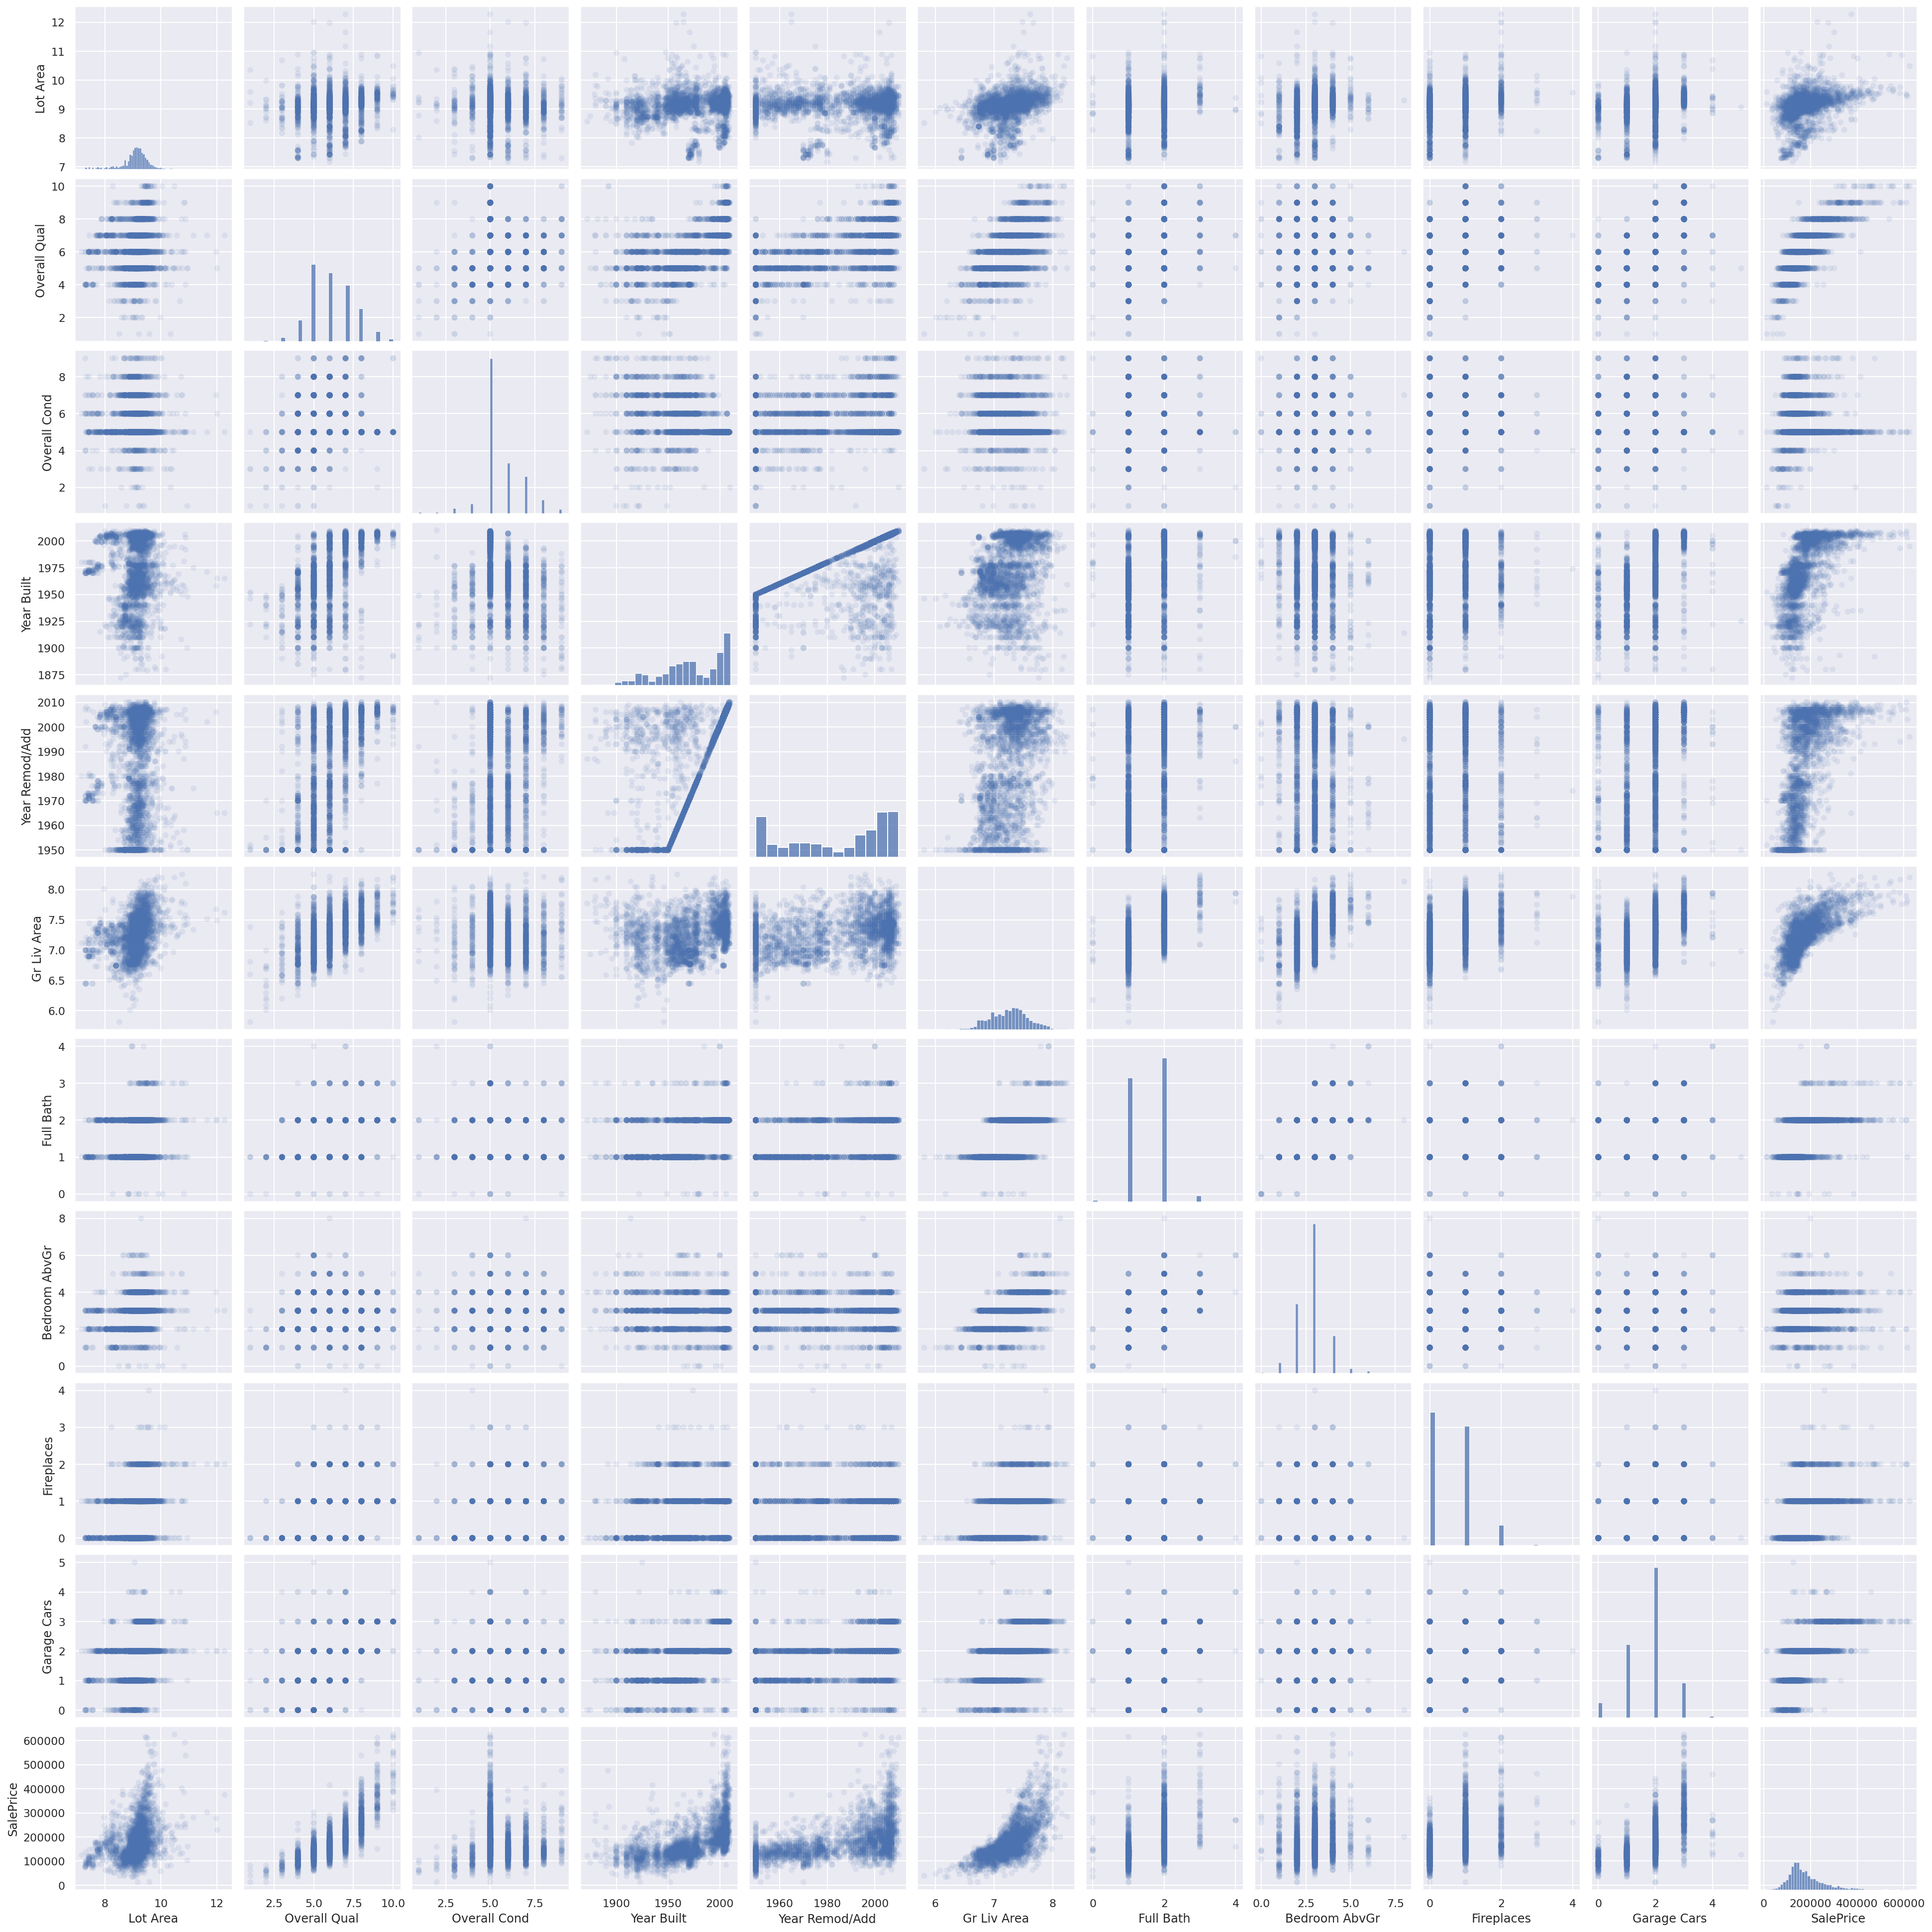

In [28]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.

In [29]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 251.4 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model.

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward.

## Basic feature engineering: adding polynomial and interaction terms

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like *'Overall Qual'* and *'Gr Liv Qual'*, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets.

### Polynomial Features

In [31]:
X2 = X.copy()

#square the Overall Qual and Gr Liv Qual to make it quadratic
X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2

As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing *'Overall Qual'* for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies *'Overall Qual'* by *'Year Built'* can help us capture it.

Another style of interaction term involves feature proportions: for example, to get at something like quality per square foot we could divide *'Overall Qual'* by *'Lot Area'*.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions

In [32]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

## Categories and features derived from category aggregates

Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the *'House Style'* feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.


In [33]:
data['House Style'].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:

In [34]:
pd.get_dummies(df['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.

In [35]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

In [36]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [37]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

#### Getting to fancier features

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form

In [39]:
#this is a smaller version of the dataframe 
#the only categorical value here is neighbourhood
X4

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_x_YB,OQ_/_LA,Neighborhood
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2.0,36,54.949070,11760,0.578798,NAmes
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1.0,25,46.227161,9805,0.534146,NAmes
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1.0,36,51.738303,11748,0.627236,NAmes
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2.0,49,58.597755,13776,0.751058,NAmes
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2.0,25,54.705776,9985,0.524402,Gilbert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8.979417,6,6,1984,1984,6.911747,1,3,0,2.0,36,47.772251,11904,0.668195,Mitchel
2926,9.092232,5,5,1983,1983,6.805723,1,2,0,2.0,25,46.317859,9915,0.549920,Mitchel
2927,9.253591,5,5,1992,1992,6.878326,1,3,0,0.0,25,47.311375,9960,0.540331,Mitchel
2928,9.211440,5,5,1974,1975,7.237059,1,2,1,2.0,25,52.375023,9870,0.542803,Mitchel


use .transform() to come up with a value for every single row. Then get the mean value of overall quality by neighborhood. The repeat values (5.334084) mean they are from the same neighbourhood

In [41]:
X4.groupby('Neighborhood')['Overall Qual'].transform(lambda x: x.mean())

0       5.334086
1       5.334086
2       5.334086
3       5.334086
4       6.515152
          ...   
2925    5.543860
2926    5.543860
2927    5.543860
2928    5.543860
2929    5.543860
Name: Overall Qual, Length: 2925, dtype: float64

Get the standard deviation by neighborhood.

In [42]:
X4.groupby('Neighborhood')['Overall Qual'].transform(lambda x: x.std())

0       0.776573
1       0.776573
2       0.776573
3       0.776573
4       0.720823
          ...   
2925    1.048727
2926    1.048727
2927    1.048727
2928    1.048727
2929    1.048727
Name: Overall Qual, Length: 2925, dtype: float64

In [43]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [44]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')

In [45]:
X5

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_x_YB,OQ_/_LA,Neighborhood,House Style,Year Built_Dev_House Style,Overall Qual_Dev_Neighborhood
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2.0,36,54.949070,11760,0.578798,NAmes,1Story,-0.590334,0.857503
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1.0,25,46.227161,9805,0.534146,NAmes,1Story,-0.551186,-0.430205
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1.0,36,51.738303,11748,0.627236,NAmes,1Story,-0.668629,0.857503
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2.0,49,58.597755,13776,0.751058,NAmes,1Story,-0.277154,2.145211
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2.0,25,54.705776,9985,0.524402,Gilbert,2Story,0.545208,-2.101974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8.979417,6,6,1984,1984,6.911747,1,3,0,2.0,36,47.772251,11904,0.668195,Mitchel,SLvl,0.505068,0.434947
2926,9.092232,5,5,1983,1983,6.805723,1,2,0,2.0,25,46.317859,9915,0.549920,Mitchel,1Story,0.310059,-0.518590
2927,9.253591,5,5,1992,1992,6.878326,1,3,0,0.0,25,47.311375,9960,0.540331,Mitchel,SFoyer,1.096487,-0.518590
2928,9.211440,5,5,1974,1975,7.237059,1,2,1,2.0,25,52.375023,9870,0.542803,Mitchel,1Story,-0.042269,-0.518590


## Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [50]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [53]:
feat_array = pf.transform(df[features])
# pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))